### Challenge 5 Questions : Linear Regression and Train/Test Split

### Challenge 1

In [2]:
## Challenge 1:
#Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome 
#(like domestic total gross). How can you interpret the results of this model? What does it predict? 
#Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?


In [3]:
# read the csv as a dataframe
import pandas as pd
df = pd.read_csv('/Users/jennifer/Desktop/sea18_ds3/challenges/challenges_data/2013_movies.csv')

In [4]:
df.shape

(100, 7)

In [5]:
X = pd.DataFrame()
X['constant'] = [1] * 100  # Create a column called 'constant' with 100 '1's
y = df['DomesticTotalGross']   # Set Y as the dep. var

In [6]:
import statsmodels.api as sm
model = sm.OLS(y,X)  #build the model using sm OLS

/home/chad/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
fit = model.fit() #Fit the model

In [8]:
fit.summary()

/home/chad/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Wed, 31 Jan 2018   Prob (F-statistic):                nan
Time:                        16:47:19   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    1.006e+08   8.74e+06     11.510      0.000    8.33e+07    1.18e+08
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,0,'Actual DTG Values')

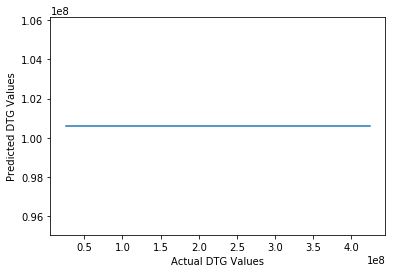

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
y_predict = fit.predict(X)  # find y predictions based on X (constants)
plt.plot(y,y_predict) #Make a plot of predictions against actual outcome.
plt.ylabel('Predicted DTG Values')
plt.xlabel('Actual DTG Values')

In [10]:
residuals = y - y_predict #Obtain residuals

(array([ 29.,  18.,  12.,   9.,  10.,   5.,   3.,   0.,   2.,   1.,   3.,
          1.,   2.,   1.,   0.,   0.,   0.,   1.,   1.,   2.]),
 array([ -7.50286242e+07,  -5.50736344e+07,  -3.51186446e+07,
         -1.51636548e+07,   4.79133498e+06,   2.47463248e+07,
          4.47013146e+07,   6.46563044e+07,   8.46112942e+07,
          1.04566284e+08,   1.24521274e+08,   1.44476264e+08,
          1.64431253e+08,   1.84386243e+08,   2.04341233e+08,
          2.24296223e+08,   2.44251213e+08,   2.64206202e+08,
          2.84161192e+08,   3.04116182e+08,   3.24071172e+08]),
 <a list of 20 Patch objects>)

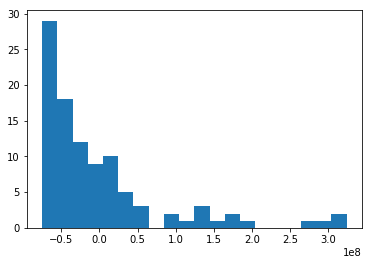

In [11]:
plt.hist(residuals, bins = 20)

In [29]:
#This shows that the residuals are close to zero because most movies are close to the mean domestic gross.
#which is the coefficient of the constant independent variable X which is just 1

### Question 2

In [30]:
#Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. 
#Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [12]:
import copy
X2 = copy.deepcopy(X)
X2['Budget'] = df['Budget']

In [13]:
model1 = sm.OLS(y,X2, missing = 'drop')

In [14]:
fit1 = model1.fit()

In [15]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     34.82
Date:                Wed, 31 Jan 2018   Prob (F-statistic):           6.80e-08
Time:                        16:47:49   Log-Likelihood:                -1738.1
No. Observations:                  89   AIC:                             3480.
Df Residuals:                      87   BIC:                             3485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant     4.44e+07   1.27e+07      3.504      0.001    1.92e+07    6.96e+07
Budget         0.7846      0.133      5.901      0.000       0.520       1.049
==============================================================================
Omnibus:                       39.749   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.441
Skew:                           1.587   Prob(JB):                     2.55e-22
Kurtosis:                       7.091   Cond. No.                     1.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
y_predict1 = fit1.predict(X2)

Text(0,0.5,'DTG (Predicted)')

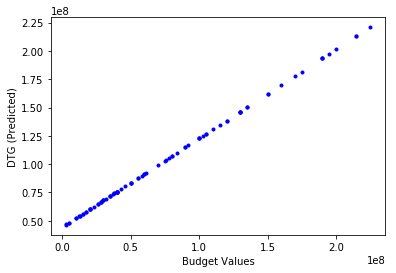

In [17]:
plt.plot(X2['Budget'], y_predict1,'b.')
plt.xlabel('Budget Values')
plt.ylabel('DTG (Predicted)')

In [18]:
residuals1 = y_predict1 - y

Text(0,0.5,'Residuals')

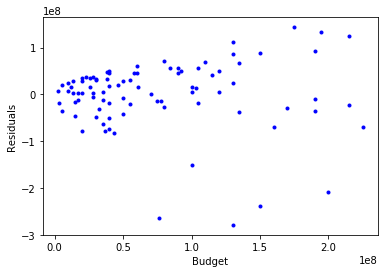

In [19]:
plt.plot(X2['Budget'], residuals1, 'b.')
plt.xlabel('Budget')
plt.ylabel('Residuals')

### Question 3

In [20]:
#Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). 
#How can you interpret what's happening in the model?
X3 = copy.deepcopy(X2)
X3['PG-13'] = (df.Rating == 'PG-13').astype(int)
X3['PG'] = (df.Rating == 'PG').astype(int)
X3['G'] = (df.Rating == 'G').astype(int)
X3['R'] = (df.Rating == 'R').astype(int)


In [21]:
X3.pop('Budget')

0     130000000.0
1     200000000.0
2     150000000.0
3      76000000.0
4     225000000.0
5     100000000.0
6             NaN
7             NaN
8     160000000.0
9     215000000.0
10    190000000.0
11    170000000.0
12    190000000.0
13    135000000.0
14     43000000.0
15     37000000.0
16     40000000.0
17    105000000.0
18     20000000.0
19     35000000.0
20     80000000.0
21    120000000.0
22     50000000.0
23     40000000.0
24    130000000.0
25     78000000.0
26     75000000.0
27    100000000.0
28     30000000.0
29    103000000.0
         ...     
70     60000000.0
71     10000000.0
72     58000000.0
73            NaN
74            NaN
75     38000000.0
76      2500000.0
77    175000000.0
78            NaN
79     12000000.0
80     30000000.0
81     80000000.0
82     30000000.0
83            NaN
84    130000000.0
85            NaN
86            NaN
87            NaN
88     20000000.0
89     60000000.0
90     26000000.0
91     40000000.0
92     10000000.0
93     28000000.0
94      50

In [22]:
X3

,constant,PG-13,PG,G,R
0,1,1,0,0,0
1,1,1,0,0,0
2,1,0,1,0,0
3,1,0,1,0,0
4,1,1,0,0,0
5,1,1,0,0,0
6,1,0,0,1,0
7,1,1,0,0,0
8,1,1,0,0,0
9,1,0,1,0,0


In [23]:
model3 = sm.OLS(y,X3)
fit3 = model3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     3.924
Date:                Wed, 31 Jan 2018   Prob (F-statistic):             0.0109
Time:                        16:48:28   Log-Likelihood:                -1964.2
No. Observations:                 100   AIC:                             3936.
Df Residuals:                      96   BIC:                             3947.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    1.162e+08   1.77e+07      6.568      0.000    8.11e+07    1.51e+08
PG-13      -4.744e+06   2.01e+07     -0.236      0.814   -4.46e+07    3.51e+07
PG          1.494e+07   2.44e+07      0.613      0.541   -3.34e+07    6.33e+07
G           1.523e+08   6.73e+07      2.265      0.026    1.88e+07    2.86e+08
R           -4.63e+07   2.07e+07     -2.241      0.027   -8.73e+07    -5.3e+06
==============================================================================
Omnibus:                       46.897   Durbin-Watson:                   0.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.261
Skew:                           1.826   Prob(JB):                     1.88e-24
Kurtosis:                       6.589   Cond. No.                     1.80e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.3e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Question 4

In [24]:
#Enhance your model further by adding more features and/or transforming existing features. 
#Think about how you build the model matrix and how to interpret what the model is doing.
X4 = copy.deepcopy(X3)

In [25]:
X4['Budget'] = df.Budget

In [26]:
X4['Runtime'] = df.Runtime

In [27]:
X4.head()

,constant,PG-13,PG,G,R,Budget,Runtime
0,1,1,0,0,0,130000000.0,146
1,1,1,0,0,0,200000000.0,129
2,1,0,1,0,0,150000000.0,108
3,1,0,1,0,0,76000000.0,98
4,1,1,0,0,0,225000000.0,143


In [28]:
model4 = sm.OLS(y,X4,missing = 'drop')

In [29]:
fit4 = model4.fit()

In [30]:
fit4.summary()

/home/chad/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/chad/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/chad/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/chad/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     9.089
Date:                Wed, 31 Jan 2018   Prob (F-statistic):           3.77e-06
Time:                        16:48:54   Log-Likelihood:                -1737.0
No. Observations:                  89   AIC:                             3484.
Df Residuals:                      84   BIC:                             3497.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant   -1.012e+07   4.05e+07     -0.250      0.803   -9.08e+07    7.05e+07
PG-13      -1.342e+07   1.98e+07     -0.677      0.500   -5.28e+07     2.6e+07
PG          1.438e+07   1.74e+07      0.826      0.411   -2.02e+07     4.9e+07
G                   0          0        nan        nan           0           0
R          -1.109e+07   2.03e+07     -0.547      0.586   -5.14e+07    2.92e+07
Budget         0.7036      0.165      4.255      0.000       0.375       1.032
Runtime     6.083e+05   5.21e+05      1.168      0.246   -4.27e+05    1.64e+06
==============================================================================
Omnibus:                       36.883   Durbin-Watson:                   0.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.319
Skew:                           1.525   Prob(JB):                     1.33e-18
Kurtosis:                       6.591   Cond. No.                     3.11e+25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.36e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Question #5

In [50]:
#Fitting and checking predictions on the exact same data set can be
#misleading. Divide your data into two sets: a training and a test set
#(roughly 75% training, 25% test is a fine split). Fit a model on the
#training set, check the predictions (by plotting versus actual values)
#in the test set.

In [31]:
from sklearn import cross_validation 
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X4,y,test_size=.25)

/home/chad/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
model5 = sm.OLS(y_train,X_train,missing = 'drop')

In [33]:
fit5 = model5.fit()

In [34]:
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     5.656
Date:                Wed, 31 Jan 2018   Prob (F-statistic):           0.000613
Time:                        16:49:24   Log-Likelihood:                -1275.7
No. Observations:                  66   AIC:                             2561.
Df Residuals:                      61   BIC:                             2572.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant   -9.554e+06   3.71e+07     -0.257      0.798   -8.38e+07    6.47e+07
PG-13      -5.259e+05   1.82e+07     -0.029      0.977    -3.7e+07     3.6e+07
PG         -3.655e+06   1.84e+07     -0.199      0.843   -4.04e+07    3.31e+07
G           -4.63e-10   3.24e-09     -0.143      0.887   -6.94e-09    6.01e-09
R          -5.373e+06   1.88e+07     -0.286      0.776    -4.3e+07    3.23e+07
Budget         0.5681      0.165      3.441      0.001       0.238       0.898
Runtime     5.841e+05   4.71e+05      1.239      0.220   -3.59e+05    1.53e+06
==============================================================================
Omnibus:                       36.824   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.052
Skew:                           1.616   Prob(JB):                     8.53e-27
Kurtosis:                       8.762   Cond. No.                     3.63e+25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  4e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [35]:
#Predict against actual values
y_predict5 = fit5.predict(X_test)

Text(0,0.5,'some numbers')

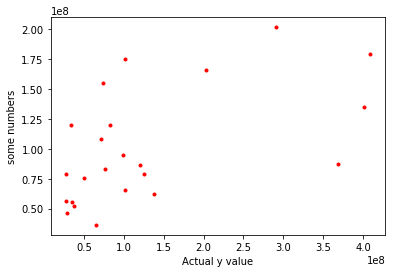

In [36]:

plt.plot(y_test,y_predict5,'r.')
plt.xlabel('Actual y value')
plt.ylabel('some numbers')

**CS: Hmm, maybe a more informative $y$-axis label would be nice :)**